## Multi-task Cascaded Convolutional Networks (2016)

Paper: https://arxiv.org/abs/1604.02878


The proposed CNNs consist of three stages. 
  1. In the first stage, it produces candidate windows quickly through a shallow CNN.
  2. Then, it refines the windows to reject a large number of non-faces windows through a more complex CNN. 
  3. Finally, it uses a more powerful CNN to refine the result and output facial landmarks positions.
  

![image.png](https://i.gyazo.com/7ebf18caa468dc5abb446f35afc941ed.png)


In [60]:
import cv2
import PIL
import torch
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from facenet_pytorch import MTCNN
from tqdm import tqdm_notebook

In [18]:
def read_frame_as_size(video_path, size=(128, 128)):
    capture = cv2.VideoCapture(str(video_path))
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, size)
    capture.release()
    return frame

def read_frame(video_path):
    capture = cv2.VideoCapture(str(video_path))
    ret, frame = capture.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    capture.release()
    return frame


def read_all_frames(video_path):
    capture = cv2.VideoCapture(str(video_path))
    all_frames = []
    ret = True
    while True:
        ret, frame = capture.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            all_frames.append(frame)
        else:
            break
    
    capture.release()
    return all_frames


In [19]:
data = Path('../data')

# Two easy faces to ensure that we can get facial recognition working
easy1 = data/'dfdc_train_part_2/abmjszfycr_REAL.mp4'
easy2 = data/'dfdc_train_part_11/aqyvunegbf_REAL.mp4'

In [20]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
detector = MTCNN(device=device, post_process=False)

In [21]:
frame1 = read_frame(easy1)
frame2 = read_frame(easy2)

pilimg1 = PIL.Image.fromarray(frame1)
pilimg2 = PIL.Image.fromarray(frame2)

In [22]:
face1 = detector(pilimg1).permute(1,2,0) / 255
face2 = detector(pilimg2).permute(1,2,0) / 255

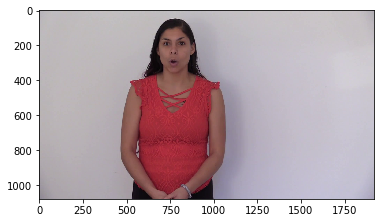

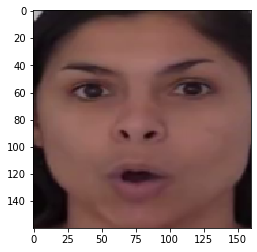

In [23]:
plt.imshow(frame1)
plt.show()
plt.imshow(face1)
plt.show()

Face seems distorted.

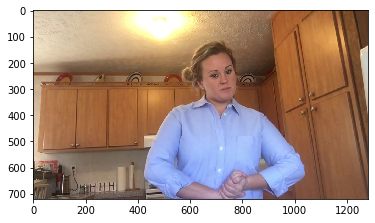

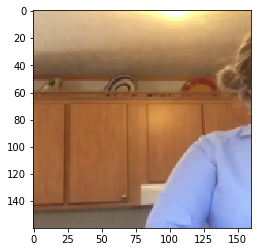

In [24]:
plt.imshow(frame2)
plt.show()
plt.imshow(face2)
plt.show()

Hmm. That second one seems off...

Let's go through all of the frames in these videos and get a face for each one.

In [72]:
def predict_all_frames(frames):
    
    predictions = []
    for frame in tqdm_notebook(frames):
        pilimg = PIL.Image.fromarray(frame)
        face = detector(pilimg).permute(1,2,0) / 255
        
        if face is not None:
            predictions.append(face)
            
    return predictions

In [73]:
all_frames1 = read_all_frames(easy1)
all_frames2 = read_all_frames(easy2)

all_faces1 = predict_all_frames(all_frames1)
all_faces2 = predict_all_frames(all_frames2)

/home/josh/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [79]:
def show_faces(faces, rows, columns, figsize=(20, 20)):
    
    axes = plt.subplots(rows, columns, figsize=figsize)[1]
    
    for row in range(rows):
        rowOffset = row * columns
        
        for column in range(columns):
            if rowOffset + column < len(faces):
                face = faces[rowOffset + column]
                axes[row,column].imshow(face)

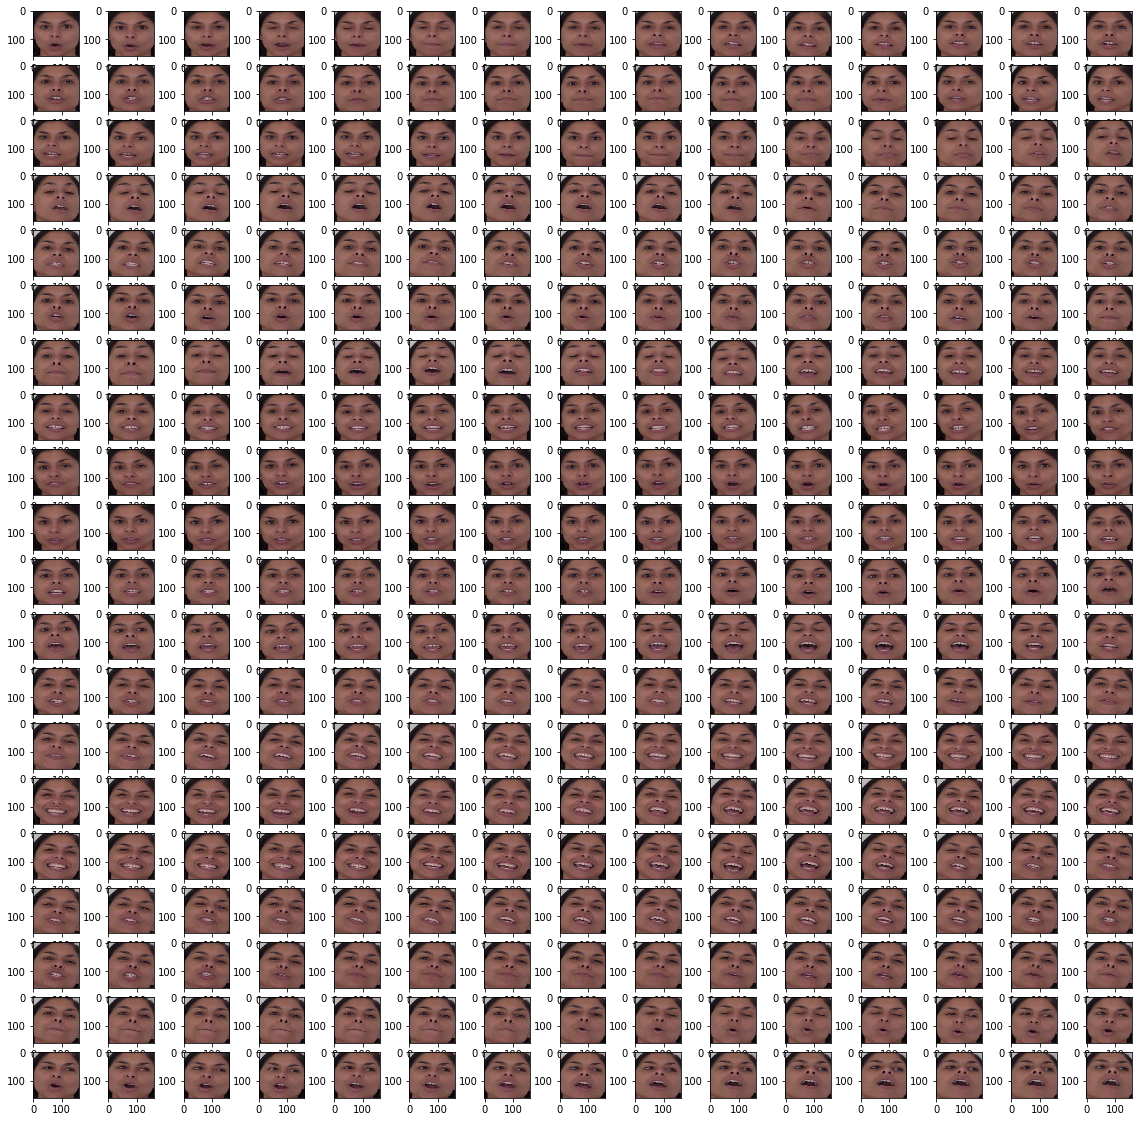

In [80]:
show_faces(all_faces1, 20, 15)

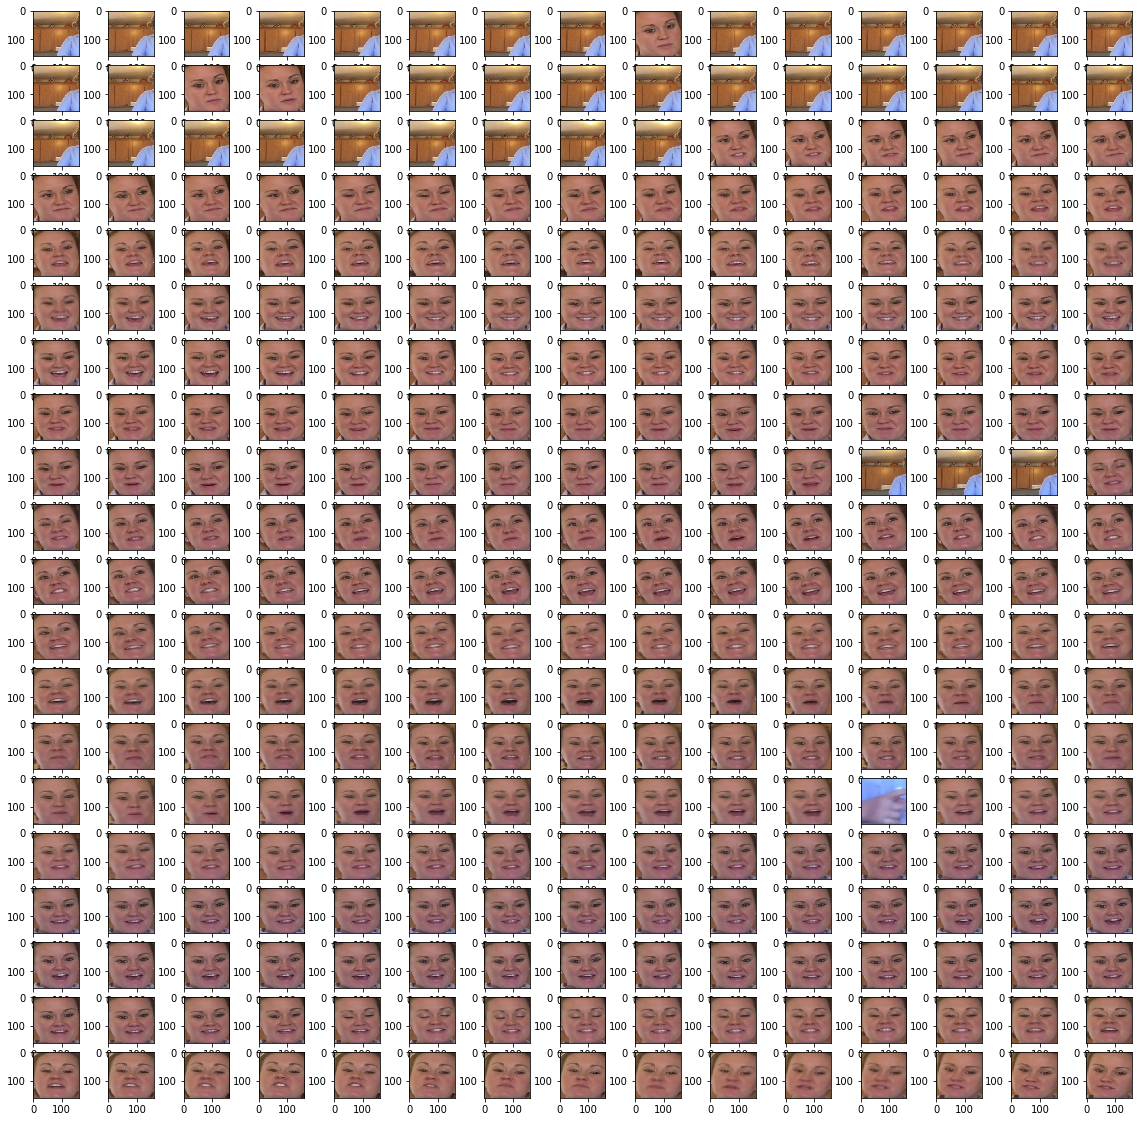

In [81]:
show_faces(all_faces2, 20, 15)